# Team Members:
- Amir Mobayen
- Leelav Kareem
- Nikita Chistyakov

## Topic:
A Recurrent Neural Network, based on LSTM or GRU

## Libraries

In [45]:
# Basic packages
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

tf.get_logger().setLevel('ERROR')


# About the dataset:
List of tweet texts with emotion labels like joy, sadness, fear, anger…
Dataset is split into train, test and validation sets for building the machine learning model. At first, you are
given only train and test sets. The validation one will be given in the end of the project for you to check
the final performance of your algorithm (to make sure there is no overfitting over the test data).
You can work on this project on group of one, two or three students. This exercise is mandatory, not
giving it back is equivalent to getting to lowest grade

# Goal:
- Train different kind of models able to classify each text according to the sentiment mainly present
in it
- Compare the results of your different models and try to analyze and explain the differences

# Parameters

In [46]:
data_file = './NLP_exam_real_case_dataset/train.csv'
test_flie = './NLP_exam_real_case_dataset/test.csv'

# Preparing Dataset

In [47]:
train_data = pd.read_csv(data_file, delimiter=',', header=0)
test_data = pd.read_csv(test_flie, delimiter=',', header=0)

train_data.head(), test_data.head()

(   Unnamed: 0                                      article_title  is_ecology
 0        1079  Stations essence à Rochefort-en-Terre : les me...           0
 1        1515  À Brest, le chantier de La Boussole se fait at...           0
 2          51  Météorite en Normandie : à la recherche de pré...           0
 3        1419  Résultats trimestriels mitigés pour les géants...           0
 4        2181  Opinion | Sobriété énergétique : les solutions...           1,
    Unnamed: 0                                      article_title  is_ecology
 0          56  Plan de sortie de flotte: seules sept demandes...           0
 1         279  Agressé, l’agriculteur Paul François, figure d...           1
 2           1  Stations essence à La Bouillie : les meilleurs...           0
 3         213  Accord sur le partage de la valeur: le Medef n...           0
 4         282  ZFE et et transports en commun : bus et cars d...           1)

In [48]:
train_data = train_data.iloc[:, 1:]
test_data = test_data.iloc[:, 1:]
train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_title  2215 non-null   object
 1   is_ecology     2215 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   article_title  294 non-null    object
 1   is_ecology     294 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


(None, None)

In [49]:
def tokenizer(text, max_len=None):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    vocab_size = len(tokenizer.word_index) + 1
    if not max_len:
        max_len = max([len(seq) for seq in sequences])
    return pad_sequences(sequences, maxlen=max_len, padding='post'), max_len, vocab_size

In [50]:
train_x, max_len, vocab_size = tokenizer(train_data.iloc[:, 0])
test_x, _, _ = tokenizer(test_data.iloc[:, 0], max_len)

In [51]:
label_encoder = LabelEncoder()
train_y = label_encoder.fit_transform(train_data.iloc[:, 1])
test_y = label_encoder.transform(test_data.iloc[:, 1])

# Model

In [52]:
# Define the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 100, input_length=max_len))
model.add(tf.keras.layers.Conv1D(64, 5, activation='leaky_relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(32, activation='leaky_relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 37, 100)           765500    
                                                                 
 conv1d (Conv1D)             (None, 33, 64)            32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 64)            0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               24832     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0

2023-07-23 10:37:40.311838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 10:37:40.322025: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 10:37:40.323479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [53]:
tf.keras.backend.clear_session()

early = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_x, train_y,
                    epochs=100,
                    batch_size=8,
                    validation_data=[test_x, test_y],
                    # validation_split=0.2,
                    callbacks=[early]
                    )

Epoch 1/100


2023-07-23 10:37:40.722243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 10:37:40.723677: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 10:37:40.724757: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

272/277 [============================>.] - ETA: 0s - loss: 0.1319 - accuracy: 0.9770

2023-07-23 10:37:45.347042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 10:37:45.348377: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 10:37:45.349476: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

277/277 [==============================] - 5s 10ms/step - loss: 0.1330 - accuracy: 0.9765 - val_loss: 0.5373 - val_accuracy: 0.8197
Epoch 2/100
277/277 [==============================] - 2s 9ms/step - loss: 0.0788 - accuracy: 0.9801 - val_loss: 1.1337 - val_accuracy: 0.8163
Epoch 3/100
277/277 [==============================] - 2s 8ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 1.7327 - val_accuracy: 0.8163
Epoch 4/100
277/277 [==============================] - 2s 8ms/step - loss: 1.8428e-04 - accuracy: 1.0000 - val_loss: 1.8855 - val_accuracy: 0.8163
Epoch 5/100
277/277 [==============================] - 2s 8ms/step - loss: 1.1570e-04 - accuracy: 1.0000 - val_loss: 1.9882 - val_accuracy: 0.8163
Epoch 6/100
277/277 [==============================] - 2s 9ms/step - loss: 5.3661e-05 - accuracy: 1.0000 - val_loss: 2.0622 - val_accuracy: 0.8163


# Evaluation

In [54]:
loss, accuracy = model.evaluate(test_x, test_y)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

10/10 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.8197
Test Loss: 0.5372718572616577
Test Accuracy: 0.819727897644043


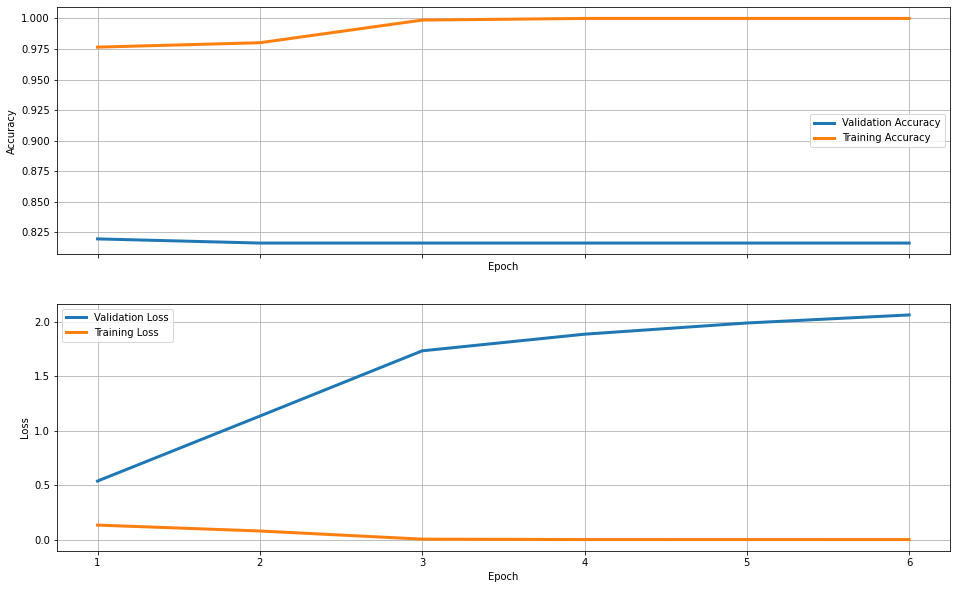

In [55]:
def plot_results(history):
    hist_df = pd.DataFrame(history.history)
    hist_df.columns = ["loss", "accuracy", "val_loss", "val_accuracy"]
    hist_df.index = np.arange(1, len(hist_df) + 1)

    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
    axs[0].plot(hist_df.val_accuracy, lw=3, label='Validation Accuracy')
    axs[0].plot(hist_df.accuracy, lw=3, label='Training Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].grid()
    axs[0].legend(loc=0)
    axs[1].plot(hist_df.val_loss, lw=3, label='Validation Loss')
    axs[1].plot(hist_df.loss, lw=3, label='Training Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].grid()
    axs[1].legend(loc=0)

    plt.show();


plot_results(history)

# Sample Test

In [56]:
count = 0
sample_range = 10
for i in range(sample_range):
    sample = test_data.iloc[i, 0]
    sample_test, _, _ = tokenizer([sample])  # Tokenize the sample as a list

    sample_test = pad_sequences(sample_test, maxlen=max_len)  # Pad the sequence to match max_len
    test_predict = model.predict(sample_test)
    prediction = np.argmax(test_predict)

    # After obtaining the predicted class index
    predicted_label = label_encoder.inverse_transform([prediction])[0]
    true_label = test_data.iloc[i, 1]
    if predicted_label == true_label:
        count += 1
    print(f'Predicted class vs True Class: [{predicted_label}, {true_label}]')

print(f'\nsample accuracy = {count / sample_range}')

2023-07-23 10:37:57.849243: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 10:37:57.850663: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 10:37:57.851802: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 443ms/step
Predicted class vs True Class: [0, 0]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [0, 1]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [0, 0]
1/1 [==============================] - 0s 11ms/step
Predicted class vs True Class: [0, 0]
1/1 [==============================] - 0s 13ms/step
Predicted class vs True Class: [0, 1]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [0, 0]
1/1 [==============================] - 0s 13ms/step
Predicted class vs True Class: [0, 0]
1/1 [==============================] - 0s 14ms/step
Predicted class vs True Class: [0, 1]
1/1 [==============================] - 0s 13ms/step
Predicted class vs True Class: [0, 0]
1/1 [==============================] - 0s 12ms/step
Predicted class vs True Class: [0, 1]

sample accuracy = 0.6
